<a href="https://colab.research.google.com/github/joydeep03564/Machine_Learning-/blob/master/Github_bug_prediction_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


 Business problem: In software business, broadly we have two kinds of companies:
1. Application developing organisation 
2. Tools companies 

The application developing organisation develops software/systems for both B2B ecosystem and B2C ecosystem. Their broad focus remains solving business problems or making human life easy and better.It can be enterprise software,embedded software or application for our personal  phone/apps or medical device software which goes into our body.

Where as the tool companies focus is to make the application developers life easy. 
They create tools and technology so the application developing organisation delivers their promises fast and effectively.
Most of the tool provider supports their customers through support channels, vanguely called support tickets. When ever any of the customers faces any issues during development or testing phase with the tool, they raise support tickets. In a nutsell, support tickets are nothing but customer emails with the description of the issues. 

Different organisation has different strategies of handling those supports. Generally most of them handles via manual distribution. They have technical experts who goes through each and every tickets and accordingly assign tickets to respective engineer/engineering team based on their skill sets. It also a very good source of business leads.
In some cases, we receive new business enquiries also through this channel which needs to be routed to other teams.

In this article, we will see how we can automate those task and improve the issue resolution turn around time and there by use our resources more effectly. We can concentrate on solving the issues rather than woring about distribution of those tickets manualy. 
As an organisation increases it foot prints, number of support request you receive also increases exponentially.Handing this manually is time consuming and tedeous job.

we are going to understand how we can create a multi class classification systems of the support email. 
Similar problem used to prevail in  our emails. Few decades backs,classifyng legitimate emails from junk used to be considered as a hard problem. Now a days our we wintness the power of machine learning and can see  the invitable change if we observe how effectively our gmail is cassifing our emails into primary, promotion,junks/spams. With machine learning and deep learning,  we can build classfication systems of such scale. 
Lets jump in and learn how we can implements this in python.








# Context and datatset: 
Classifying an unseen emails into bugs,features or questions on Github can be a similar problem we discussed about. In  your organisation, if your system can automotically classifying emails which needs to route to different groups like bug fixes  to your local R&D or L3 support, questions for to sales team/business teams and features to respective product team. It drastcally cut down the turn arround time and there by you can create a competative advantage.

I am taking a similar data set from kaggle to demonstate how we can build a classification system that can classify emails by into bugs,feature and question.

The dataset can found here [GitHub Bugs Prediction](https://www.kaggle.com/anmolkumar/github-bugs-prediction)





# Loading the dataset:
 

### importing the libraries for loading the dataset:

The dataset description:

Train.json - 150000 rows x 3 columns (Includes label Column as Target variable)

Test.json - 30000 rows x 2 columns

Train_extra.json - 300000 rows x 3 columns (Includes label Column as Target variable)

Provided solely for training purposes, can be appended in the train.json for training the model

For simplicity and to save computing hours, I am going to use train.json 1500000 rows X 3 columns.

**Attribute Description:**

Title - the title of the GitHub bug, feature, question

Body - the body of the GitHub bug, feature, question

Label - Represents various classes of Labels

Bug - 0

Feature - 1

Question - 2



In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 



In [3]:
dataset = pd.read_json("/content/drive/MyDrive/NLP/NLP_Projects/Git_hub_bug_prediction/Git_hub_bug_prediction/embold_train.json")

In [4]:
dataset.head()

,title,body,label
0,y-zoom piano roll,a y-zoom on the piano roll would be useful.,1
1,buggy behavior in selection,! screenshot from 2016-02-23 21 27 40 https:/...,0
2,auto update feature,"hi,\r \r great job so far, @saenzramiro ! : \r...",1
3,filter out noisy endpoints in logs,i think we should stop logging requests to:\r ...,1
4,enable pid on / pid off alarm actions for ardu...,expected behavior\r alarm actions pid on and p...,0


We have title,body and a given label as described above.

In [5]:
dataset.shape

(150000, 3)

### Feature engineering 

In [6]:
# Checking the random sample of title and body 

import random 

random_title = random.choice(dataset['title'])

print(random_title)

collision issues with recent commit, e4bdde9


In [7]:
random_body = random.choice(dataset['body'])
random_body

"hi guys, i have integrated cypht into my existing project. here is stranger behavior of cypht when i am directly logging into cypht i am getting configuration for imap and smpt and it is working fine for sending and receiving emails. \\r but when i try to login using functional login i am getting error for smtp server settings but imap settings are working fine.\\r any help will be appreciated. \\r -------------------------------------------\\r require '<your path to cypht>/modules/api_login/api.php';\\r cypht_login $user, $pass, $url ;\\r https://github.com/jasonmunro/cypht/wiki/api-login"

Observation: 

Mostly all the titles and body are written in small letter. Symbols like 
/,.\\ // are there but capturing those meaning might be helpfull for the preditor, as this is not a generic text classification problem symbols 
like https:// ,makes ,\systemctl preset-all\ makes sense in software development environment.  

During creating vectors from the text we would like to capture the sequencial information created by those symbols. Hence not going to remove them in the first models. 
Later point in time, going to do an experimentation by removing the results. 


 

### Feature engineering:
Whenever we receive a request, major weightage goes to the title. For that reason, we will give more weightage to the title.
One way of doing that is repeating the title statement. But as the machine learning understand the patterns. We should not do it.
https://stackoverflow.com/questions/38034702/how-to-put-more-weight-on-certain-features-in-machine-


1. We can try repeating  the title feature and create more wightage to the title.

In [8]:
# Merging the title and Body into a single text

dataset['Text_feature']= dataset['body']+dataset['title']

In [9]:
dataset.head()

,title,body,label,Text_feature
0,y-zoom piano roll,a y-zoom on the piano roll would be useful.,1,a y-zoom on the piano roll would be useful.y-z...
1,buggy behavior in selection,! screenshot from 2016-02-23 21 27 40 https:/...,0,! screenshot from 2016-02-23 21 27 40 https:/...
2,auto update feature,"hi,\r \r great job so far, @saenzramiro ! : \r...",1,"hi,\r \r great job so far, @saenzramiro ! : \r..."
3,filter out noisy endpoints in logs,i think we should stop logging requests to:\r ...,1,i think we should stop logging requests to:\r ...
4,enable pid on / pid off alarm actions for ardu...,expected behavior\r alarm actions pid on and p...,0,expected behavior\r alarm actions pid on and p...


In [10]:
dataset = dataset.drop(columns=['title','body'])

In [11]:
dataset.shape

(150000, 2)

In [12]:
dataset.head()

,label,Text_feature
0,1,a y-zoom on the piano roll would be useful.y-z...
1,0,! screenshot from 2016-02-23 21 27 40 https:/...
2,1,"hi,\r \r great job so far, @saenzramiro ! : \r..."
3,1,i think we should stop logging requests to:\r ...
4,0,expected behavior\r alarm actions pid on and p...


In [13]:
X = dataset.iloc[:,1]

In [ ]:
X.shape

(150000,)

In [ ]:
X[0]

'a y-zoom on the piano roll would be useful.y-zoom piano roll'

In [ ]:
y = dataset.iloc[:,0]

In [ ]:
y[0]

1

In [ ]:
print(type(y))

<class 'pandas.core.series.Series'>


### Visualization of the dataset:

We are visualizing the distribution 


In [ ]:
# Distribution of label
label_dist = y.value_counts()

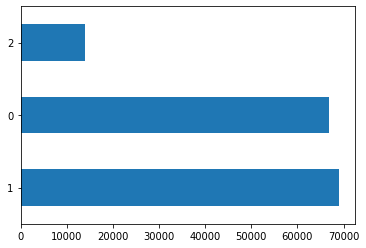

In [ ]:
label_dist.plot.barh()

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
#printing the shapes of the training and test data:

print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(105000,) (105000,) (45000,) (45000,)


### Vectorising the train dataset Text Features using  TFIDF:


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf= TfidfVectorizer(stop_words=None,max_features=10000)
X_train_tfidf = tfidf.fit_transform(x_train)
X_test_tfidf = tfidf.transform(x_test)

In [ ]:
#Printing the shapes of the x_train_tfidf,x_test_tfidf

X_train_tfidf.shape,X_test_tfidf.shape


((105000, 10000), (45000, 10000))

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_train_le= le.fit_transform(y_train)
y_test_le = le.transform(y_test)


In [ ]:
y_train_le.shape,y_test_le.shape

((105000,), (45000,))

### Solving the data Imbalance :


We have label imbalance in the dataset. We will use upsampling strategy to meet the imbalance.
We are going to use SMOTE to upsample the minority class i.e data points with label 2.
Further details can be found here:
https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#r001eabbe5dd7-1


In [ ]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE(random_state=42,k_neighbors=5,sampling_strategy='minority')
x_train_smote,y_train_smote = smote.fit_resample(X_train_tfidf,y_train_le)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
x_train_smote.shape,y_train_smote.shape

((143538, 10000), (143538,))

In [ ]:
type(x_train_smote),type(y_train_smote)

(scipy.sparse.csr.csr_matrix, numpy.ndarray)

In [ ]:
unique,counts  = np.unique(y_train_smote,return_counts=True)



In [ ]:
print(unique,counts)

[0 1 2] [46826 48356 48356]


### Creating smaller dataset for faster training:

In [ ]:
#Creating Smaller proportions of the dataset
x_train_smote_small= x_train_smote[:50000]
y_train_smote_small = y_train_smote[: 50000]


In [ ]:
x_test_small = X_test_tfidf[:5000]
y_test_small = y_test[:5000]

### Base line Model:

Hard voting

In [ ]:
### Creating Base Line Model using NaiveBayes, Logistic,Random Forest and ensembling i.e votingclassifier

from  sklearn.ensemble  import  RandomForestClassifier 
from  sklearn.ensemble  import  VotingClassifier 
from  sklearn.linear_model  import  LogisticRegression 
from  sklearn.svm  import  SVC
from sklearn.naive_bayes import MultinomialNB


In [ ]:
log_clf = LogisticRegression(max_iter=1000)
rnd_clf = RandomForestClassifier()
svm_clf = SVC(max_iter=1000)

voting_clf  =  VotingClassifier( estimators=[('lr',  log_clf),  ('rf',  rnd_clf),  ('svc',  svm_clf)], voting='hard') 
voting_clf.fit(x_train_smote_small,  y_train_smote_small)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                            

We are using ensembles of 3 models i.e logistic regression, randomforest and svm classifier. We are aggregating the predictions of each classifier 
and predicting the class that get maximum votes. This type of mojority voting classifier is called hard voting classifier.

In [ ]:
from sklearn.metrics import accuracy_score

for clf in (log_clf,rnd_clf,svm_clf,voting_clf):
  clf.fit(x_train_smote_small,y_train_smote_small)
  y_pred = clf.predict(x_test_small)
  print(clf.__class__.__name__,accuracy_score(y_test_small,y_pred))

LogisticRegression 0.7672
RandomForestClassifier 0.7424


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC 0.5814


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


VotingClassifier 0.7592


The majority classifer is not performing well. One of the reason can be the bad performance of SVM.
In the next step we will replace the SVM classifier to multinomial naive bayes.

In [ ]:
log_clf = LogisticRegression(max_iter=1000)
rnd_clf = RandomForestClassifier()
mulnb_clf = MultinomialNB()

voting_clf  =  VotingClassifier( estimators=[('lr',  log_clf),  ('rf',  rnd_clf),  ('mltnb',  mulnb_clf)], voting='soft') 
voting_clf.fit(x_train_smote_small,  y_train_smote_small)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                            

In [ ]:
from sklearn.metrics import accuracy_score

for clf in (log_clf,rnd_clf,mulnb_clf,voting_clf):
  clf.fit(x_train_smote_small,y_train_smote_small)
  y_pred = clf.predict(x_test_small)
  print(clf.__class__.__name__,accuracy_score(y_test_small,y_pred))

LogisticRegression 0.7672
RandomForestClassifier 0.7436
MultinomialNB 0.7236
VotingClassifier 0.7642


### Improvement points:

1. Train on the whole data 
2. We will try to fit non-linear models like Nueral networks.

### Deep Learning based Technique: 
We will do the following 

    1. Use Deep MLP

    2. RNN Models 

    3. BERT 
    
    4. Transformer 


### Creating word embedding 

### Preparing the dataset 


In [14]:
# Suffling the dataset :

dataset_suffle=dataset.sample(frac=1 ,random_state=42)
dataset_suffle.head()


,label,Text_feature
59770,0,i can't seem to get past this issue. when i ru...
21362,1,here is the code:\r if image == nil \r ...
127324,1,add the option to enable/disable backface cull...
140509,0,if an animal with an preexisting logo.png in...
144297,0,i want marble stairs but my 12k marble apparen...


In [15]:
from sklearn.model_selection import train_test_split

train_sentence,validation_sentence,train_label,validation_label = train_test_split(dataset_suffle['Text_feature'],dataset_suffle['label'],test_size=0.3,random_state=42)

In [16]:
  train_sentence.shape,train_label.shape,validation_sentence.shape,validation_label.shape

((105000,), (105000,), (45000,), (45000,))

In [17]:
unique,counts  = np.unique(train_label,return_counts=True)

In [18]:
unique,counts 

(array([0, 1, 2]), array([46696, 48581,  9723]))

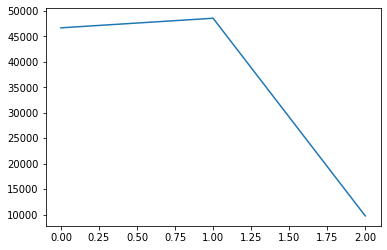

In [19]:
plt.plot(unique,counts)

### Solving Data Imbalance:
We can see that the dataset is severely imbalanced. There are different ways to handle that. Some of them are given below:

1. Giving class weights during training 
2. Sampling upsampling and down sampling 
3. SMOTE 
4. Go ahead and build the model and use the right matrix to understand the model performance like F1 score.

In this is case, we are going to use upsampling technique 



### Upsampling
Bug - 0,Feature - 1, Question - 2, In our training dataset questions is minority class and we are going to upsample questions to 4000. In order to create the upsample dataset, we are consolidating the training data into a dataframe.



In [20]:
X = pd.DataFrame({'text_feature':train_sentence,'label':train_label})
X.head()

,text_feature,label
119648,see if auth0 has a \ keep this going\ request...,0
6017,nomad version\r nomad v0.7.0\r \r operatin...,0
45391,<!--\r before opening a new issue:\r - please ...,0
125528,recently we closed last gaps in this functiona...,1
57425,we could simplify application.conf and our l...,1


In [21]:
# Dividing the dataset into classes

df_bugs = X[X['label']==0]

df_feature = X[X['label']==1]

df_questions =X[X['label']==2]

In [22]:
df_bugs.shape,df_feature.shape,df_questions.shape

((46696, 2), (48581, 2), (9723, 2))

In [23]:
from sklearn.utils import resample

df_questions = resample(df_questions,replace=True,n_samples=len(df_bugs),random_state=42)

In [24]:
df_questions.shape

(46696, 2)

In [25]:
new_training_data= pd.concat([df_bugs,df_feature,df_questions])

In [26]:
new_training_data.shape

(141973, 2)

In [27]:
new_training_data.head()

,text_feature,label
119648,see if auth0 has a \ keep this going\ request...,0
6017,nomad version\r nomad v0.7.0\r \r operatin...,0
45391,<!--\r before opening a new issue:\r - please ...,0
147327,- errors are not coloured red.\r - errors are ...,0
31840,"hi,\r \r after adding ~7m entries, the client ...",0


In [28]:
new_training_data= new_training_data.sample(frac=1,random_state=42) 

In [29]:
new_training_data.head()

,text_feature,label
82430,"i'm happy to make pr s for these, but i thoug...",2
12806,http://codepen.io/shyam-chen/pen/rvpexy?editor...,0
17927,"as i understand, this should be put as a side ...",2
124231,"hi,\r \r _same issue/question as https://githu...",2
123878,integrate slackin https://github.com/rauchg/...,1


In [30]:
###Splitting the train_sentence and train_label

upsampled_train_sentence = new_training_data['text_feature'].to_numpy()
upsampled_train_label = new_training_data['label'].to_numpy()



In [31]:
upsampled_train_label.shape,upsampled_train_sentence.shape


((141973,), (141973,))

 Coverting text into numbers: 
 This is the first step toward any NLP problem. Our algorithim don't understand text,
 they understand numbers. So we need to represent our text data in a vector form.
 There are many ways to do that,here we will use tokenization and embedding.


In [32]:
# We are importing the tensorflow library 
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

We have a nice library in tensorflow to perform text tokenisation. 
We are importing that. It is in experimental stage and for this project, we are going to use that.
Further tutorial can be found here :
[TextVectorization](https://https://keras.io/api/layers/preprocessing_layers/core_preprocessing_layers/text_vectorization/), I found that the stable vesrions is also avalble so the below can also be used for Vectorization -[tf.keras.layers.TextVectorization](https://https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization)


We are finding the average length of the text sentences of the features. This will help us to decide upon the lenth of the max_token variable.

In [33]:
# Finding the average length of the sentence 
round(sum([len(i.split()) for i  in upsampled_train_sentence])/len(upsampled_train_sentence))

86

In [34]:
# Finding the 80th percentile of the lenth of text.
np.percentile([len(i.split()) for i  in upsampled_train_sentence],80)

125.0

In [35]:
# Setup the text vectorization variables 

max_vocab_length = 20000 # This is the size of the vocabulary 
max_length = 128         # Max length of the output. 

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,output_mode='int',output_sequence_length=max_length)

In [36]:
# Fit the text Vectorizer to the training text

text_vectorizer.adapt(upsampled_train_sentence)

In [37]:
random_sentence = random.choice(upsampled_train_sentence)

print(f" The original sentence \n {random_sentence}")
print(f"The vectorized sentence:\n")
text_vectorizer(random_sentence)

 The original sentence 
 i have a workspace with three machines node. when i stop workspace and open the workspace again, i found some data lost in container and the script in entrypoint will be run again. for example, i have a machine which will install a database when the containers startup. if i restart the workspace, i found the install script will be executed again. i do not see this problem if i run the container in docker directly with docker stop/start.\r \r what does che do to the containers when stop a workspace and start it again?how does che stop/start the containers when stop/start workspace or stop/start che server?
The vectorized sentence:



<tf.Tensor: shape=(128,), dtype=int64, numpy=
array([    9,    25,     5,  1493,    17,  1233,  2303,   202,    23,
           9,   747,  1493,     8,   149,     3,  1493,   404,     9,
         150,    56,    68,  1720,     6,   446,     8,     3,   270,
           6,  4846,    45,    14,    87,   404,    11,   109,     9,
          25,     5,   721,    49,    45,   182,     5,   299,    23,
           3,  1354,  1381,    19,     9,  1070,     3,  1493,     9,
         150,     3,   182,   270,    45,    14,  1418,   404,     9,
          48,    16,    74,    12,   132,    19,     9,    87,     3,
         446,     6,   271,   662,    17,   271,     1,     2,    52,
          70,  2200,    48,     4,     3,  1354,    23,   747,     5,
        1493,     8,   175,    13,     1,    70,  2200, 17107,     3,
        1354,    23, 17107,  1493,    26, 17107,  2200,    98,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,   

In [38]:
# Printing the unique words in the vocabulary 

words_in_vocab = text_vectorizer.get_vocabulary()

top_25= words_in_vocab[:25]
least_25_words = words_in_vocab[-25:]

print(f"Number of words in vocab:{len(words_in_vocab)}")
print(f"The most frenquent 25 words in vocab :{top_25}")
print(f"The least frequent 25 words in vocab:{least_25_words}")


Number of words in vocab:20000
The most frenquent 25 words in vocab :['', '[UNK]', 'r', 'the', 'to', 'a', 'in', 'is', 'and', 'i', 'of', 'for', 'this', 'it', 'be', 'on', 'not', 'with', 'that', 'if', 'at', 'as', 'from', 'when', 'but']
The least frequent 25 words in vocab:['systemid', 'systemexit', 'symantec', 'sydney', 'swingnode', 'swiftlint', 'suppression', 'superstruct', 'superclasses', 'success1', 'subscript', 'subprocesscalledprocesserror', 'subjectr', 'subcommandr', 'stun', 'struck', 'stricthostkeycheckingno', 'streisanddiagnosticsmd', 'streamroutingoptionsallr', 'storetruer', 'storefront', 'storagequeuego888', 'stoped', 'stemcell', 'stbviewproxy']


We have not removed any stop words for this problem, hence we are seeing the stop words as more frenquently apprearing words.

Next step is to create an word emdedding such that similar words have more simlar vector reprentation and disimilar words have more different representational vector.

###Creating the embedding layer:

To make our embedding layer, we are going to use the tensorflow's embedding layer.
The parameter we care most are given below:



*   input_dim = The size of the Vocab
*   Output_dim = The size of the output embedding. 

*   input_length = The length of the senquence being passed to the embedding layer







In [39]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set the input shape
                             output_dim=128, # Output shape
                             embeddings_initializer ='uniform',
                             input_length=max_length # How long is each input
                             )

In [40]:
 random_sentence = random.choice(upsampled_train_sentence)
 print(f'The original Text:\n {random_sentence}')
 print(f'The tokensised Text:\n: {text_vectorizer(random_sentence)}')
 sample_embed  = embedding(text_vectorizer([random_sentence]))
 sample_embed

The original Text:
 i had hoped this was already done, but i get the impression from https://github.com/w3c/payment-request/pull/628 that there hasn't been a clear decision on privacy protections, suggesting the specification hasn't followed a  privacy by design process or included appropriate risk assessments.\r \r please can the w3c provide material of a privacy by design approach, supported by privacy impact assessments that businesses can then confidently re-use in their own compliance processes, instead of each business have to do their own privacy by design and privacy impact assessment considerations for implementing or adopting this spec.\r \r if implementations, perhaps from google, are already in use then perhaps google can volunteer the privacy impact assessment and designs they've already completed to be added as drafts to the appendices to the spec and the w3c process can then review them.\r \r    further context\r like most country regulators, the uk's ico has some guidan

<tf.Tensor: shape=(1, 128, 128), dtype=float32, numpy=
array([[[-0.00931258, -0.01333785, -0.04533945, ...,  0.04679351,
          0.02874428,  0.03473497],
        [ 0.04967619, -0.02949139, -0.02805606, ...,  0.04437715,
         -0.04819012,  0.04435343],
        [ 0.02701913,  0.04865905, -0.01671455, ...,  0.00138682,
          0.03110286,  0.02425132],
        ...,
        [-0.00015986, -0.00804765,  0.00597914, ...,  0.04643536,
         -0.02027628,  0.01228684],
        [ 0.0195675 , -0.04015139, -0.01004643, ..., -0.02979503,
         -0.01538849,  0.01648751],
        [-0.04469535,  0.02061052, -0.03656768, ...,  0.01904205,
          0.00137131, -0.01371062]]], dtype=float32)>

In [41]:
#Downloading the helper function for performance matrix

!wget https://raw.githubusercontent.com/joydeep03564/Machine_Learning-/master/helper_functions.py

--2021-09-01 14:57:00--  https://raw.githubusercontent.com/joydeep03564/Machine_Learning-/master/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4021 (3.9K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   3.93K  --.-KB/s    in 0s      

2021-09-01 14:57:00 (44.1 MB/s) - ‘helper_functions.py’ saved [4021/4021]



### Converting the labels into one-hot encoding:

label encoding might introduce ordinality, hence we are going to use one hot encoding 


In [42]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse=False)
upsampled_train_label_one_hot_encoded = one_hot_encoder.fit_transform(new_training_data['label'].to_numpy().reshape(-1,1))
validation_label_one_hot_encoded = one_hot_encoder.transform(validation_label.to_numpy().reshape(-1,1))

In [43]:
upsampled_train_label_one_hot_encoded.shape,validation_label_one_hot_encoded.shape

((141973, 3), (45000, 3))

### Model 1: A simple multilayer dense model


In [44]:
# Creating  a tensorflow callback
!wget https://raw.githubusercontent.com/joydeep03564/Machine_Learning-/master/Tensorflow_callbacks_plot_loss_function_compare_hst.py


--2021-09-01 14:57:12--  https://raw.githubusercontent.com/joydeep03564/Machine_Learning-/master/Tensorflow_callbacks_plot_loss_function_compare_hst.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3327 (3.2K) [text/plain]
Saving to: ‘Tensorflow_callbacks_plot_loss_function_compare_hst.py’

Tensorflow_callback 100%[===================>]   3.25K  --.-KB/s    in 0s      

2021-09-01 14:57:13 (37.0 MB/s) - ‘Tensorflow_callbacks_plot_loss_function_compare_hst.py’ saved [3327/3327]



In [45]:
# Creating the callbacks
from Tensorflow_callbacks_plot_loss_function_compare_hst import create_tensorboard_callback

SAVE_DIR = 'model_logs'

In [46]:
#Building model with the Functional API

from tensorflow.keras import layers 
inputs = layers.Input(shape=(1,),dtype=tf.string) # inputs are 1 dimentional strings 
x = text_vectorizer(inputs) # turn the input text into numbers 
x = embedding(x)  # Create the embedding of the numerical tokens
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(128,activation='relu')(x)
x =layers.Dropout(0.5)(x)
x = layers.Dense(64,activation='relu')(x)
x =layers.Dropout(0.5)(x)
x = layers.Dense(32,activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(3,activation='Softmax')(x)

model_1 = tf.keras.Model(inputs,outputs,name='model_1_dense')



In [47]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 128)               0         
_________________________________________________________________
embedding (Embedding)        (None, 128, 128)          2560000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)              

In [48]:
# compile model 

model_1.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [49]:
model_1_history = model_1.fit(x=upsampled_train_sentence,y=upsampled_train_label_one_hot_encoded,epochs=10,validation_data=(validation_sentence,validation_label_one_hot_encoded),callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,experiment_name="Model_1_dense")])

Saving TensorBoard log files to: model_logs/Model_1_dense/20210901-145732
Epoch 1/10
4437/4437 [==============================] - 59s 13ms/step - loss: 0.7527 - accuracy: 0.6911 - val_loss: 0.6655 - val_accuracy: 0.7175
Epoch 2/10
4437/4437 [==============================] - 55s 12ms/step - loss: 0.5653 - accuracy: 0.7860 - val_loss: 0.6922 - val_accuracy: 0.7324
Epoch 3/10
4437/4437 [==============================] - 59s 13ms/step - loss: 0.4736 - accuracy: 0.8196 - val_loss: 0.7765 - val_accuracy: 0.7301
Epoch 4/10
4437/4437 [==============================] - 59s 13ms/step - loss: 0.4137 - accuracy: 0.8421 - val_loss: 0.8968 - val_accuracy: 0.7355
Epoch 5/10
4437/4437 [==============================] - 60s 13ms/step - loss: 0.3742 - accuracy: 0.8550 - val_loss: 0.9734 - val_accuracy: 0.7254
Epoch 6/10
4437/4437 [==============================] - 60s 13ms/step - loss: 0.3436 - accuracy: 0.8676 - val_loss: 1.0211 - val_accuracy: 0.7204
Epoch 7/10
4437/4437 [============================

We can see that the model is over fitting. We will visualise our embedding layer to find how each tokens are being learned by the model during training.
For visualizing the embedding layers, we will use tensorflow projector tools.

In [50]:
model_1.evaluate(validation_sentence,validation_label_one_hot_encoded)

1407/1407 [==============================] - 8s 6ms/step - loss: 1.4708 - accuracy: 0.7054


[1.4708274602890015, 0.7053999900817871]

In [51]:
model_1_pred_probs = model_1.predict(validation_sentence)

In [52]:
model_1_pred_probs[0]

array([0.24758026, 0.05894146, 0.6934783 ], dtype=float32)

In [53]:
model_1_pred_probs.shape

(45000, 3)

In [54]:
model_1_pred = tf.argmax(model_1_pred_probs,axis=1)

In [55]:
model_1_pred[0]

<tf.Tensor: shape=(), dtype=int64, numpy=2>

In [ ]:
# I am using predefined helper function to print the performance metrics from my git
# This is adapted from Daniel Bourke- Tensorflow Developer certificate 2021: Udemy course
!wget https://raw.githubusercontent.com/joydeep03564/Machine_Learning-/master/helper_functions.py

--2021-09-01 14:34:07--  https://raw.githubusercontent.com/joydeep03564/Machine_Learning-/master/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4021 (3.9K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]   3.93K  --.-KB/s    in 0s      

2021-09-01 14:34:07 (46.6 MB/s) - ‘helper_functions.py.1’ saved [4021/4021]



In [56]:
from helper_functions import model_evaluation_matrix
from helper_functions import make_confusion_matrix

In [57]:
model_1_results = model_evaluation_matrix(y_true=validation_label.to_numpy(),y_pred=model_1_pred)

In [58]:
model_1_results

{'accuracy': 0.7054,
 'f1 score': 0.7127760116147944,
 'precision': 0.7252344713465569,
 'recall': 0.7054}

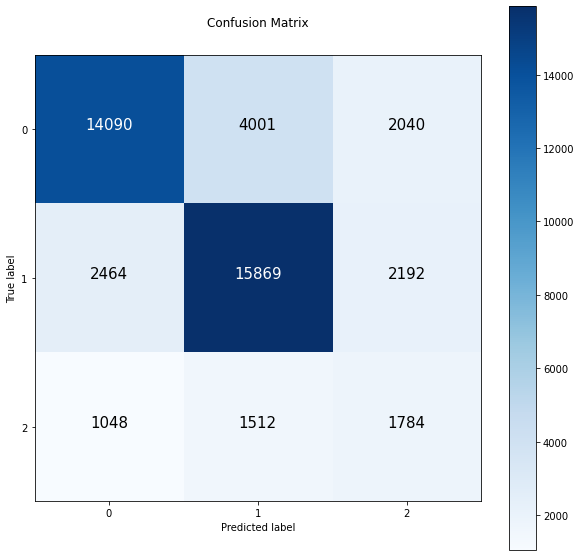

In [59]:
model_1_CM_plot= make_confusion_matrix(y_true=validation_label.to_numpy(),y_pred=model_1_pred)

###Visualizing the word embedding using tensorflow projector  tools

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 128)               0         
_________________________________________________________________
embedding (Embedding)        (None, 128, 128)          2560000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)              

In [ ]:
embed_weights = model_1.get_layer('embedding').get_weights()[0]

print(embed_weights.shape)


(20000, 128)


In [ ]:
# I have taken the code from tensorflow (https://www.tensorflow.org/text/guide/word_embeddings)
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec =embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

This function will create two files metadata.tsv and vectors.tsv. and we are opening up the http://projector.tensorflow.org/


If you are running this tutorial in Colaboratory, you can use the following snippet to download these files to your local machine (or use the file browser, View -> Table of contents -> File browser).

In [ ]:
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

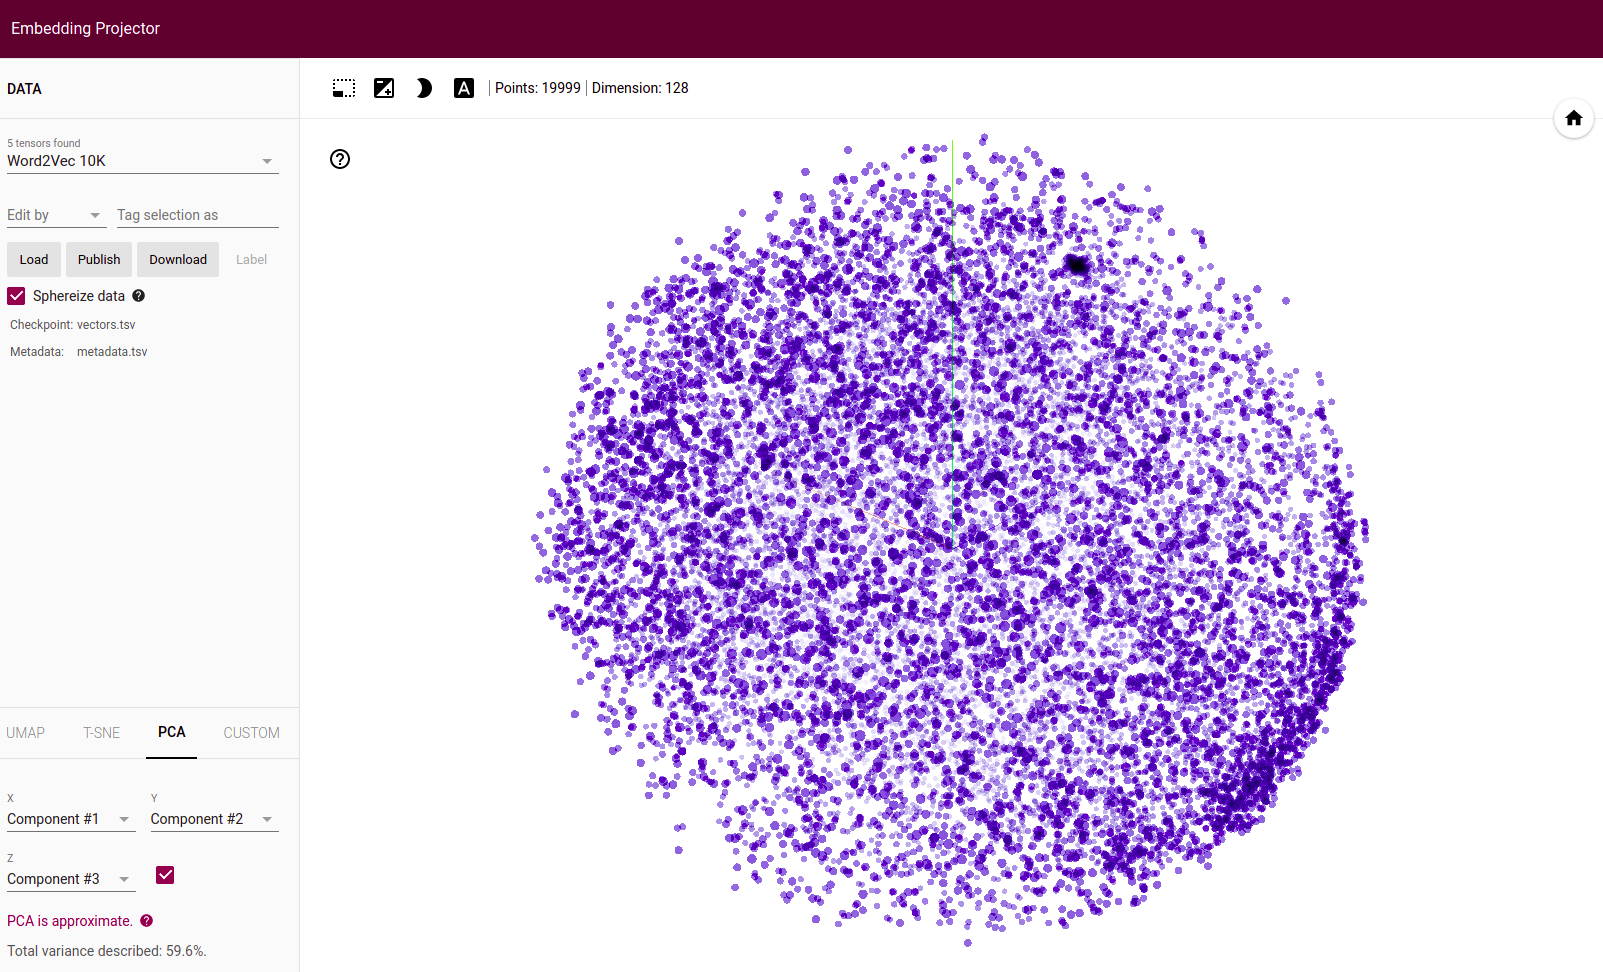

This is the the global structure of the dataset as we did dimentionality (reduced to 3d)reduction using PCA.

### Ploting the loss curve and accuracy curve 

In [ ]:
pd.DataFrame(model_1_history.history) # History tracks every epoachs 

,loss,accuracy,val_loss,val_accuracy
0,0.755644,0.690638,0.678216,0.712022
1,0.562575,0.784649,0.715014,0.728044
2,0.475113,0.820269,0.844669,0.727489
3,0.416680,0.841850,0.934487,0.738267
4,0.377914,0.856543,0.980171,0.732267
5,0.346067,0.866785,1.148283,0.729267
6,0.321794,0.875850,1.188089,0.726444
7,0.301076,0.883231,1.376028,0.724667
8,0.283763,0.888352,1.500514,0.736956
9,0.268820,0.893128,1.553074,0.727467


Text(0.5, 1.0, 'Model_1_loss_curves')

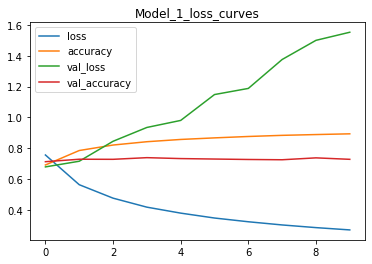

In [ ]:
pd.DataFrame(model_1_history.history).plot()
plt.title('Model_1_loss_curves')

Observation The training loss is kind of decreasing with the eapochs and accuracy has improved but in a flatter fashion.But the model is not performing well in the unseen data i.e validation data. We can conclude that our model is not generaling well.

### Model_2 LSTM:
In this section, we will try to build a model with sequential models like RNN based models.

In [60]:
# Printing the shapes of the data set
# Training the training dataset shape


upsampled_train_sentence.shape,upsampled_train_label_one_hot_encoded.shape

((141973,), (141973, 3))

In [61]:
# Printing the shapes of the validation dataset
validation_sentence.shape,validation_label_one_hot_encoded.shape


((45000,), (45000, 3))

The structure of the RNN will have the following:

Input(text)=>Tokenization=> Embedding=> LSTM/GRU Layers => Output 

In [62]:
# Creating an LSTM Model
inputs = layers.Input(shape=(1,),dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(128,return_sequences=True)(x)
x = layers.LSTM(128)(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64,activation='relu')(x)
outputs =layers.Dense(3,activation='softmax')(x)

model_2 = tf.keras.Model(inputs,outputs,name='Model_2_LSTM')

In [63]:
# Compiling the model
model_2.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [64]:
# Fit the model 

model_2_history= model_2.fit(x=upsampled_train_sentence,y=upsampled_train_label_one_hot_encoded,validation_data=(validation_sentence,validation_label_one_hot_encoded),epochs=10,callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,experiment_name="Model_2_LSTM")])

Saving TensorBoard log files to: model_logs/Model_2_LSTM/20210901-152015
Epoch 1/10
4437/4437 [==============================] - 348s 77ms/step - loss: 0.8843 - accuracy: 0.5799 - val_loss: 0.7304 - val_accuracy: 0.7051
Epoch 2/10
4437/4437 [==============================] - 332s 75ms/step - loss: 0.4309 - accuracy: 0.8315 - val_loss: 0.7539 - val_accuracy: 0.7340
Epoch 3/10
4437/4437 [==============================] - 330s 74ms/step - loss: 0.2917 - accuracy: 0.8849 - val_loss: 0.9201 - val_accuracy: 0.7394
Epoch 4/10
4437/4437 [==============================] - 321s 72ms/step - loss: 0.2314 - accuracy: 0.9069 - val_loss: 1.0010 - val_accuracy: 0.7443
Epoch 5/10
4437/4437 [==============================] - 310s 70ms/step - loss: 0.1925 - accuracy: 0.9217 - val_loss: 1.1170 - val_accuracy: 0.7354
Epoch 6/10
4437/4437 [==============================] - 329s 74ms/step - loss: 0.1569 - accuracy: 0.9366 - val_loss: 1.1984 - val_accuracy: 0.7252
Epoch 7/10
4437/4437 [=======================

Text(0.5, 1.0, 'Model_2_loss_curves')

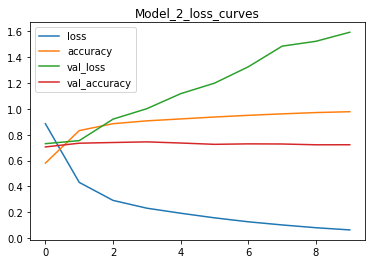

In [65]:
pd.DataFrame(model_2_history.history).plot()
plt.title('Model_2_loss_curves')

The model is not performing well in validation dataset. The issue might be due to upsampling 

# The following things will be implemented for further improvement in the part-2

1. **Increase the dataset size:** 
In the next experiment, we are going to compile the extra traning data also

2. Use class weighing instead of upsampling 

3. Use pretrained models and more advance models like Bi-LSTM, Transformer based models like BERT